In [117]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

from matplotlib import pyplot as plt

In [118]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [119]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [120]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
added_layer = Dense(32, activation='relu')(encoded)

In [121]:
# "decoded" is the lossy reconstruction of the input
decoded_layer = Dense(8 * encoding_dim, activation='relu')(added_layer)
decoded = Dense(784, activation='sigmoid')(decoded_layer)

In [122]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [123]:
# encoded and decoded
encoder = Model(input_img, encoded)
# encoded input place
encoded_input = Input(shape=(encoding_dim,))
deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [124]:
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [125]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [126]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256,shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6956 - accuracy: 8.0000e-04 - val_loss: 0.6955 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6954 - accuracy: 8.0000e-04 - val_loss: 0.6953 - val_accuracy: 0.0010
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6952 - accuracy: 7.8333e-04 - val_loss: 0.6951 - val_accuracy: 0.0011
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6949 - accuracy: 8.0000e-04 - val_loss: 0.6949 - val_accuracy: 0.0012
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6948 - accuracy: 8.5000e-04 - val_loss: 0.6947 - val_accuracy: 0.0012
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6946 - accuracy: 8.3333e-04 - val_loss: 0.6945 - val_accuracy: 0.0012
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6944 - accuracy: 8.5000e-04 - val_loss: 0.

In [127]:
# Prediction
prediction = autoencoder.predict(x_test_noisy[1].reshape(1,784))
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

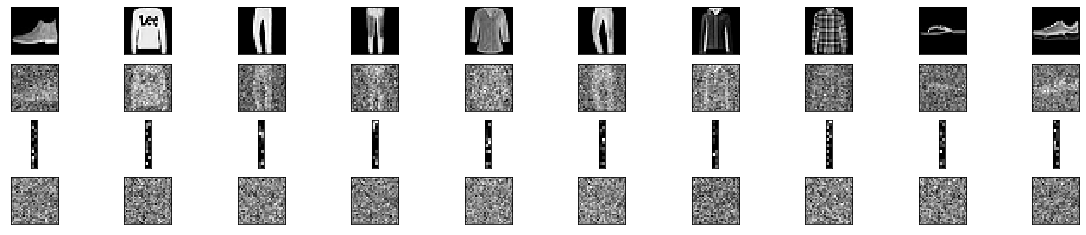

In [133]:
# visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib
 
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
     #BONUS QUESTION
    # visualize encoded 
    ax = plt.subplot(4, n, i + 1 + n + n)
    plt.imshow(encoded_imgs[i].reshape(16, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

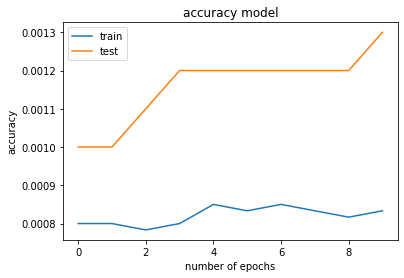

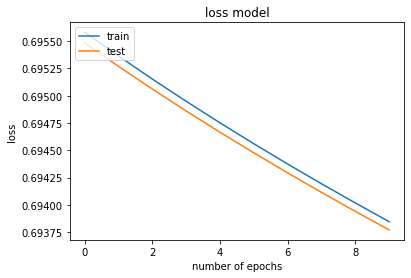

In [129]:
# plot the loss and accuracy
# history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy model')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()